In [188]:
import pandas as pd 
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
import math 
from scipy.stats import iqr
import numpy as np
import seaborn as sbn
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox 
from scipy.stats import shapiro
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Reading Dataset and organizing the run time

In [158]:
data_frame=pd.read_csv ('sgemm_product.csv') 
data_frame=data_frame.assign(AverageRunTime=data_frame.loc[:, ['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1))
data_frame= data_frame.drop(columns= ['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'])

DATA cleaning 

In [159]:
#fill up any holes in the dataset 
# all of the independent variables: MWG, NWG, KWG, MDIMC, NDIM, MDIMA , NDIMB, KWI, VWM, VWN, STRM, STRN, SA ,SB
bool1=data_frame.isnull().values.any()
print(bool1)
#no holes we need to fill 

False


In [151]:
#find duplicates in rows 
dup1=data_frame. duplicated(). any()
print(dup1)
#no duplicates to remove

False


In [152]:
#filter unwanted outliers in run time
#using the interquartile range method (IQR): 
#sorting in ascneding order the run times
train_set= train_set.sort_values('AverageRunTime')
test_set=test_set.sort_values('AverageRunTime')
IQR_df=iqr(data_frame['AverageRunTime'], axis=0)
Q1_median_Q3= np.percentile(data_frame.AverageRunTime, [25, 50, 75])
Q1= Q1_median_Q3[0] 
Q3= Q1_median_Q3[2]
min_val= Q1-1.5*IQR_df
max_val= Q3+1.5*IQR_df 
data_frame= data_frame[data_frame['AverageRunTime']>min_val]
data_frame= data_frame[data_frame['AverageRunTime']< max_val]

In [156]:
data_frame.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,AverageRunTime
count,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000,214833.000000
mean,75.688037,75.761619,25.592567,14.475690,14.470700,17.390550,17.388762,5.005544,2.339538,2.345156,0.500580,0.500044,0.486038,0.485056,0.723438
std,41.968313,41.997377,7.839899,8.111065,8.111264,9.375134,9.374445,3.000002,1.858623,1.862122,0.500001,0.500001,0.499806,0.499778,0.071887
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.487856
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.667080
50%,64.000000,64.000000,32.000000,16.000000,16.000000,16.000000,16.000000,8.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.717173
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.790950
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.848309


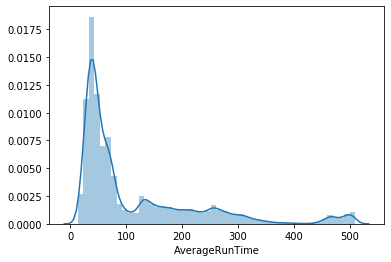

In [153]:
sbn.distplot(data_frame['AverageRunTime'])

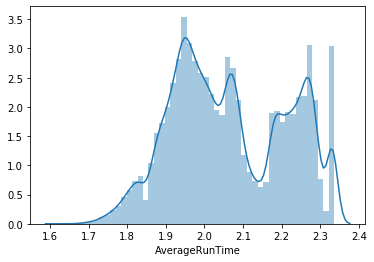

In [154]:
#The data distribution is skewed to the left. Preforming a box cox transformation. finding optimal lambda using seaborn 
#non normally distributed data will affect the SE and confidence interval 
df1= data_frame
df1['AverageRunTime']= boxcox(data_frame['AverageRunTime'])[0]
sbn.distplot(df1['AverageRunTime'])

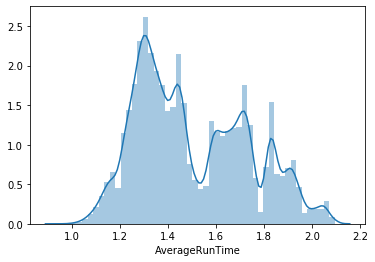

In [161]:
#box cox transformation did not normalize the data. Trying to normalize the data using a log-log 
df2=data_frame
df2['AverageRunTime'] = np.log(df2['AverageRunTime'])
sbn.distplot(df2['AverageRunTime'])

Data splitting- Train set and Test set 

In [172]:
train_set, test_set = train_test_split(data_frame, test_size=0.6)
#We will work with an average as the run time output variable 

Applying ML algorithms on the data set

In [173]:
column_header= list(train_set.columns)
column_header=column_header[0:len(column_header)-1]
print(column_header)

['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']


In [174]:
#we will train our algorithm 
#building a multivariate regression model using scikit library 
reg= linear_model. LinearRegression () #creating linear regression class object 
reg1= reg.fit(train_set[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']], train_set.AverageRunTime) #fit method to train the model 

In [190]:
reg.coef_

array([ 0.00271779,  0.00205894,  0.00269766, -0.01130307, -0.01098946,
       -0.00022413, -0.00029669, -0.00117792, -0.00242676, -0.00629139,
       -0.03264086, -0.00506023, -0.05127166, -0.01638056])

In [176]:
reg.intercept_

1.450187616591165

Accuracy of the model is 53.31


Text(0, 0.5, 'Predicted Values')

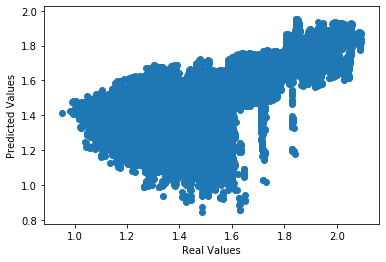

In [189]:
y_pred=reg.predict (train_set[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']])
Accuracy= r2_score(train_set['AverageRunTime'], y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy)
plt.scatter (train_set['AverageRunTime'], y_pred)
plt.xlabel('Real Values')
plt.ylabel ('Predicted Values')

In [ ]:
train_set2, test_set2 = train_test_split(data_frame, test_size=0.6)
#We will work with an average as the run time output variable 